In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Zad.

  * Wczytaj dane.
  * Wyznacz optymlną ilość grup.
  * wyznacz najleprzy algrytm grupowania wybierając naleprze parametry dla:
     * k-means
     * hierarchical
     * DBSCAN
  

In [3]:
X = np.loadtxt("./data_cl/d6_data.txt")

In [4]:
print(X.shape)

(569, 30)


##### Można zacząć od wizualizacji w 2D (proponuje t-SNE)

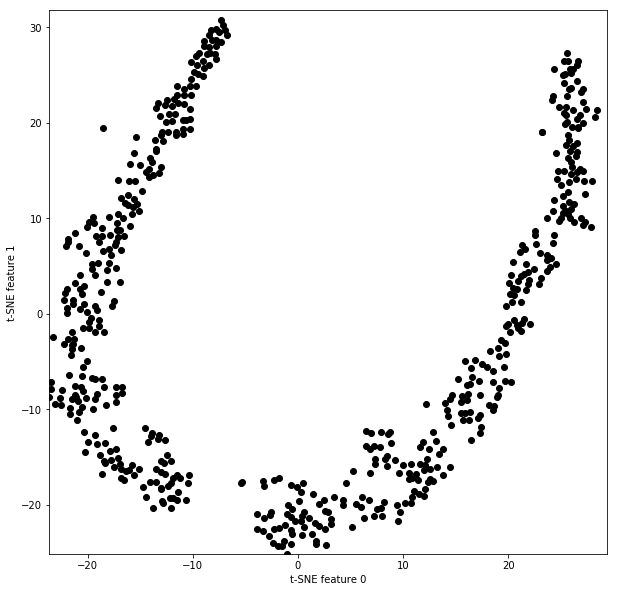

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X)
#colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c="k")
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

##### Można użyć elbow method

In [6]:
SSE_array = [None]
    
for i in range(1,21):
    km = KMeans(n_clusters=i, n_init=10)
    y_km = km.fit_predict(X)
    SSE_array.append(km.inertia_)

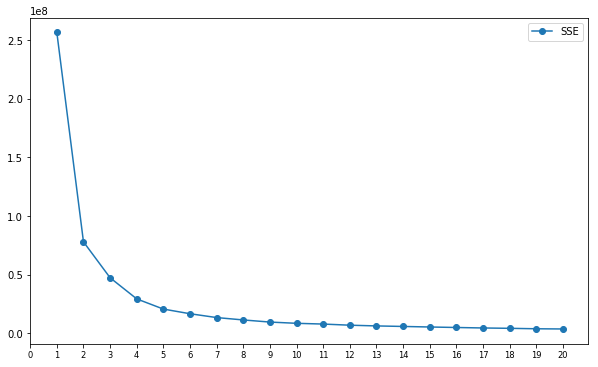

In [7]:
t=range(0,21)
plt.figure(figsize=(10,6));
plt.plot(SSE_array, "o-", label="SSE")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

#### Można użyć silhouette_score

In [8]:
from sklearn.metrics import silhouette_score

silhouette_score_array = [None, None]
    
for i in range(2,21):
    km = KMeans(n_clusters=i, n_init=10)
    y_km = km.fit_predict(X)
    silhouette_score_array.append( silhouette_score(X,km.labels_) )

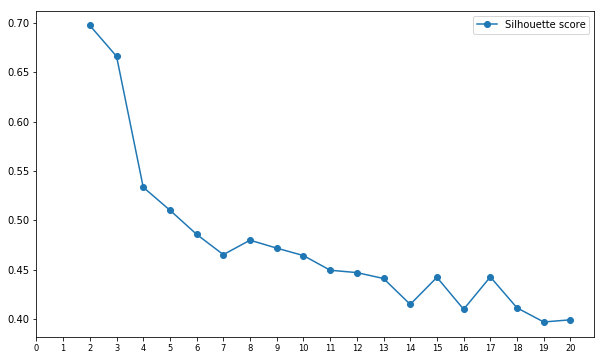

In [9]:
t=range(0,21)

plt.figure(figsize=(10,6));
plt.plot(silhouette_score_array, "o-", label="Silhouette score")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

#### Można narysowac kilka wykrsów silhouette score

In [10]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

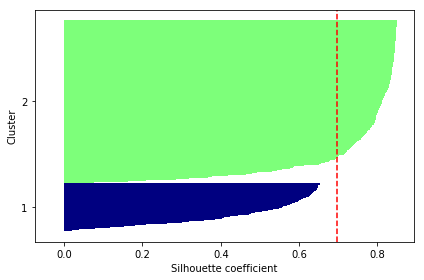

In [11]:
km = KMeans(n_clusters=2)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

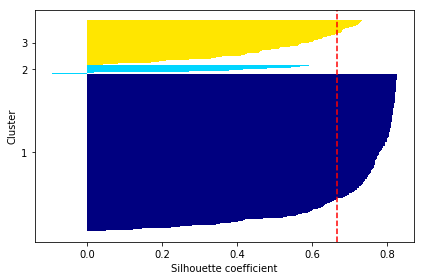

In [12]:
km = KMeans(n_clusters=3)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

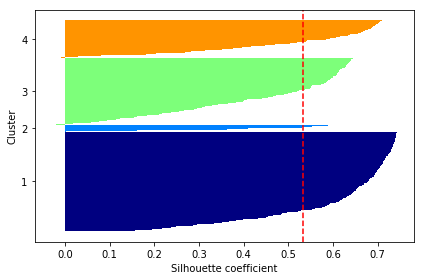

In [13]:
km = KMeans(n_clusters=4)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

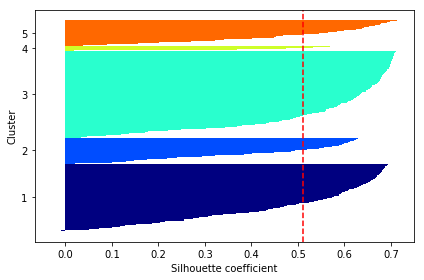

In [14]:
km = KMeans(n_clusters=5)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

# Best k-means

In [15]:
km = KMeans(n_clusters=4)
y_km = km.fit_predict(X)

# Może sprawdzić klastrowanie Hierarhiczne

In [16]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

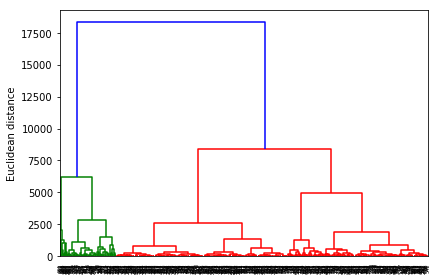

In [17]:
df = pd.DataFrame(X)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='ward') 
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()


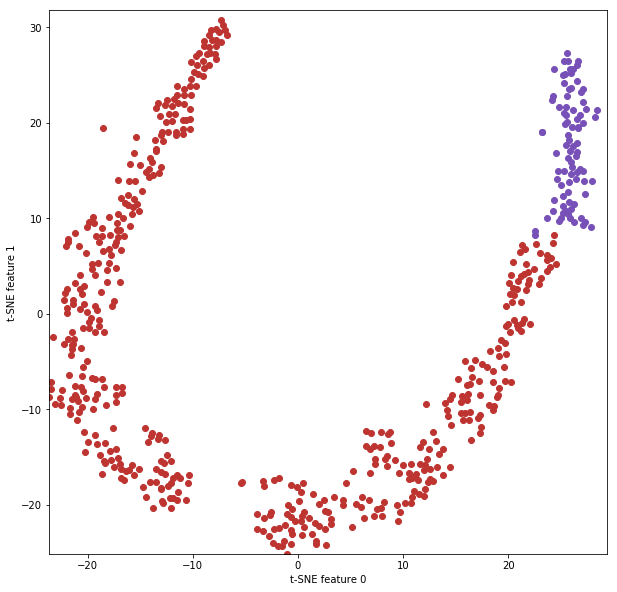

In [18]:
#może 2
part = fcluster(row_clusters, 2, 'maxclust')

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=colors[part[i]])
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

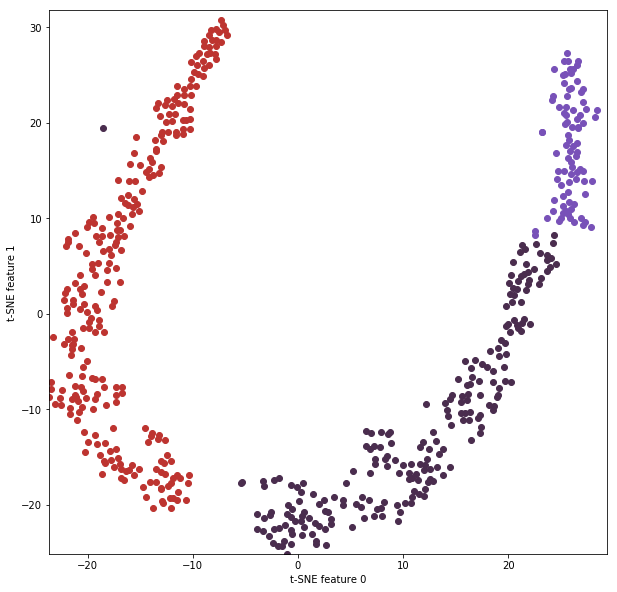

In [19]:
#może 2
part = fcluster(row_clusters, 3, 'maxclust')

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=colors[part[i]])
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

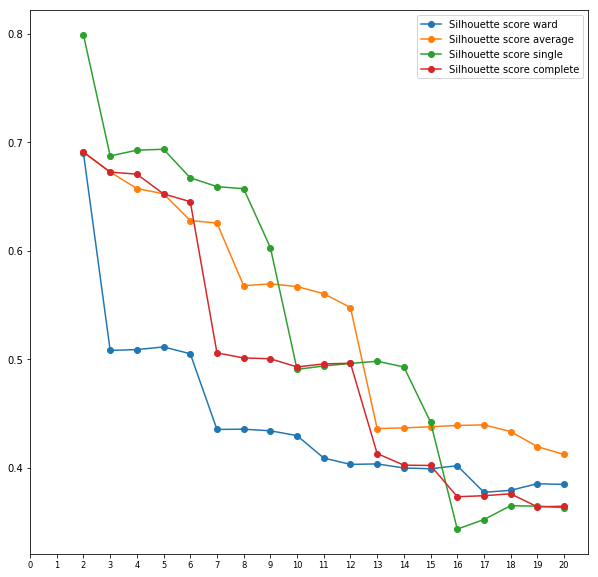

In [20]:
from sklearn.metrics import silhouette_score

plt.figure(figsize=(10, 10))

link = ['ward','average','single','complete']
for name in link:
    silhouette_score_array = [None, None]
    for i in range(2,21):
#         row_clusters = 
        y_hie = fcluster(linkage(pdist(df, metric='euclidean'), method=name) , i, 'maxclust')

        silhouette_score_array.append( silhouette_score(X, y_hie) )

    t=range(0,21)

    plt.plot(silhouette_score_array, "o-", label="Silhouette score "+str(name))
    plt.xticks(range(len(t)), t, size='small')
    plt.legend()
plt.show()   

# Best Hierarhical

In [21]:
y_hie = fcluster(row_clusters, 2, 'maxclust')

# Może DBSCAN

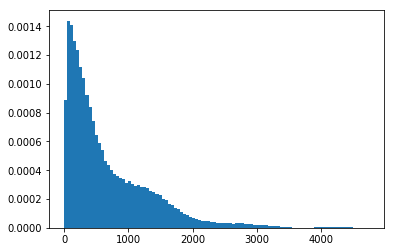

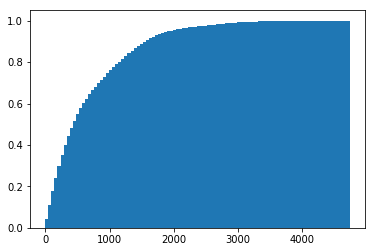

In [22]:
from sklearn.metrics.pairwise import euclidean_distances
x = euclidean_distances(X, X)

# wybieramy tylko część pod przekątną
xx = x[np.tril_indices(x.shape[0])]

plt.hist(xx,density=True, bins=100)#,cumulative=True
plt.show()
plt.hist(xx,density=True, bins=100, cumulative=True)
plt.show()

1


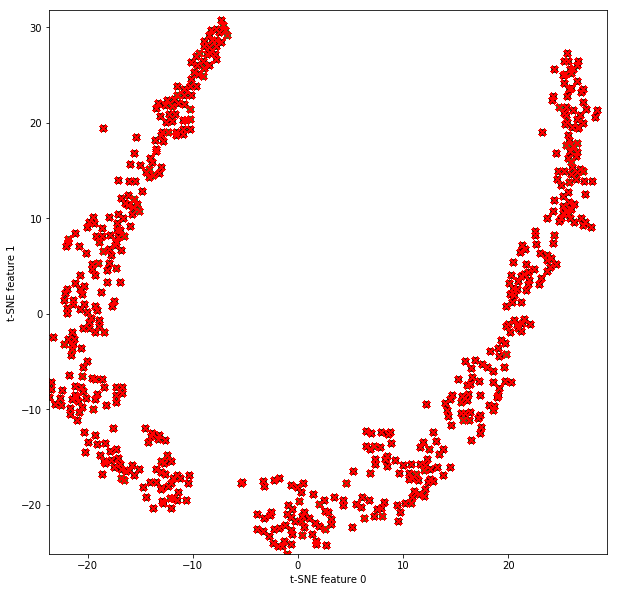

In [23]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 1, min_samples=10)
labels = model.fit_predict(X)

print( len(np.unique(labels) ))

from matplotlib import colors as mcolors
# colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=colors[labels[i]+1])
    plt.scatter(X_tsne[labels==-1,0],X_tsne[labels==-1,1], c = 'r', marker = 'x')
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()
plt.show()

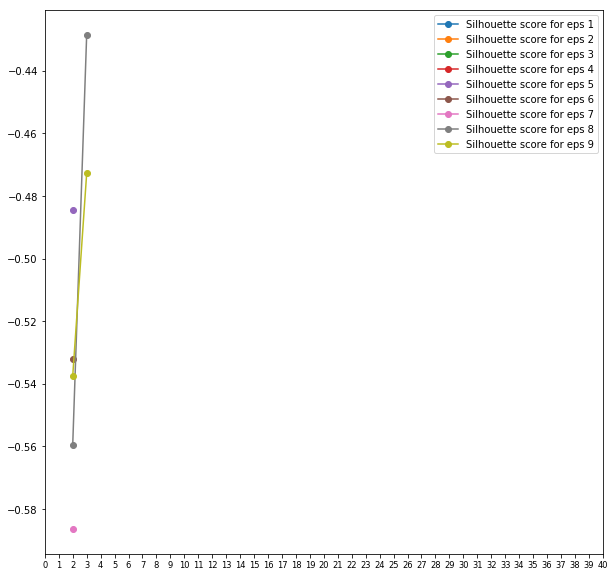

In [24]:
from sklearn.metrics import silhouette_score

plt.figure(figsize=(10, 10))

eps_array =range(1,10)
min_samples_array=range(2,41)


for i in eps_array:
    silhouette_score_array = [None, None]
    for j in min_samples_array:
        
        model = DBSCAN(eps = i, min_samples=j)
        labels = model.fit_predict(X)
        
#         print(len(np.unique(labels)))
        if( len(np.unique(labels))>2 ):
            silhouette_score_array.append( silhouette_score(X, labels+1) )
        else:
            silhouette_score_array.append( None )
    t=range(0,41)

    plt.plot(silhouette_score_array, "o-", label="Silhouette score for eps "+str(i))
    plt.xticks(range(len(t)), t, size='small')
    plt.legend()
plt.show() 

In [25]:
model = DBSCAN(eps = 50, min_samples=9)
y_db = model.fit_predict(X)

# Sprawdzamy wyniki

In [27]:
from sklearn import metrics

y = np.loadtxt("./data_cl/d6_label.txt").astype(int)
print(np.unique(y))

print(metrics.adjusted_rand_score(y, y_km))
print(metrics.adjusted_rand_score(y, y_hie))
print(metrics.adjusted_rand_score(y, y_db))

[0 1]
0.4127431467179322
0.2872456066095377
0.6982164287093072


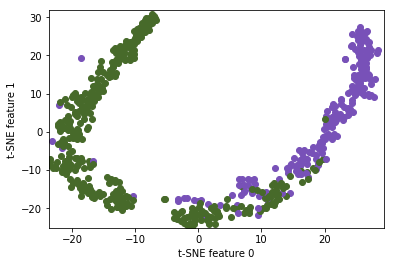

In [28]:
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=colors[y[i]])
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()